## Import the Relevant Libraries

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
from keras import layers

In [4]:
from keras import models

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
from keras import optimizers

In [7]:
import matplotlib.pyplot as plt

## Creating the Model

In [8]:
model = models.Sequential()

In [9]:
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (512, 512, 1)))

In [10]:
model.add(layers.MaxPooling2D((2, 2)))

In [11]:
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))

In [12]:
model.add(layers.MaxPooling2D((2, 2)))

In [13]:
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))

In [14]:
model.add(layers.MaxPooling2D((2, 2)))

In [15]:
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))

In [16]:
model.add(layers.MaxPooling2D((2, 2)))

## Adding a Classifier

In [17]:
model.add(layers.Flatten())

In [18]:
model.add(layers.Dense(512, activation = "relu"))

In [19]:
# model.add(layers.Dropout(0.5))

In [20]:
model.add(layers.Dense(1, activation = "sigmoid"))

## Display the Architecture of the Convnet

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 128)      0

## Configuring the Model

In [22]:
model.compile(loss = "binary_crossentropy", 
              optimizer = "RMSprop", 
              metrics = ["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

## Define Directory Paths

In [23]:
train_path = "RSNA_Mammograms_PNG_Split/train_img/"
validation_path = "RSNA_Mammograms_PNG_Split/val_img/"
test_path = "RSNA_Mammograms_PNG_Split/test_img/"

## Using ImageDataGenerator to Read Images from Directories

In [24]:
image_gen = ImageDataGenerator(rescale = 1./255)

image_gen = ImageDataGenerator(rotation_range = 10, 
                               width_shift_range = 0.05, 
                               height_shift_range = 0.05, 
                               rescale = 1./255, 
                               shear_range = 0.05, 
                               zoom_range = 0.05, 
                               horizontal_flip = True,
                               fill_mode = "nearest")

In [25]:
train_generator = image_gen.flow_from_directory(train_path,
                                                target_size = (512, 512), 
                                                color_mode = "grayscale",
                                                batch_size = 20, 
                                                class_mode = "binary")

Found 1400 images belonging to 2 classes.


In [26]:
validation_generator = image_gen.flow_from_directory(validation_path, 
                                                     target_size = (512, 512),
                                                     color_mode = "grayscale",
                                                     batch_size = 20, 
                                                     class_mode = "binary")

Found 400 images belonging to 2 classes.


In [27]:
train_generator.class_indices

{'cancer': 0, 'no_cancer': 1}

In [28]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 512, 512, 1)
labels batch shape: (20,)


## Early Stopping

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# early_stop = EarlyStopping(monitor = "val_loss", patience = 2)

## Training the Model

In [ ]:
# history = model.fit(train_generator,
#                     epochs = 50,
#                     steps_per_epoch = 70,
#                     batch_size = 20, 
#                     validation_data = validation_generator,
#                     callbacks=[early_stop])

In [29]:
history = model.fit(train_generator,
                    epochs = 30,
                    steps_per_epoch = 70,
                    batch_size = 20, 
                    validation_data = validation_generator,
                    validation_steps = 20)

Epoch 1/30
70/70 [==============================] - 172s 2s/step - loss: 0.8488 - accuracy: 0.5079 - precision: 0.5090 - recall: 0.4443 - auc: 0.4983 - val_loss: 0.6911 - val_accuracy: 0.5125 - val_precision: 0.6471 - val_recall: 0.0550 - val_auc: 0.5237
Epoch 2/30
70/70 [==============================] - 170s 2s/step - loss: 0.6804 - accuracy: 0.5757 - precision: 0.5742 - recall: 0.5857 - auc: 0.6013 - val_loss: 0.6911 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.7350 - val_auc: 0.5342
Epoch 3/30
70/70 [==============================] - 169s 2s/step - loss: 0.6654 - accuracy: 0.6121 - precision: 0.6034 - recall: 0.6543 - auc: 0.6551 - val_loss: 1.3594 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - val_auc: 0.4953
Epoch 4/30
70/70 [==============================] - 168s 2s/step - loss: 0.6274 - accuracy: 0.6350 - precision: 0.6272 - recall: 0.6657 - auc: 0.7016 - val_loss: 0.7066 - val_accuracy: 0.5150 - val_precision: 0.5133 - val_recall: 0.580

## Evaluating the Model

In [30]:
print(history.params)

{'verbose': 1, 'epochs': 30, 'steps': 70}


In [31]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])


In [35]:
accuracy = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
precision = history.history["precision"]
recall = history.history["recall"]
auc = history.history["auc"]

In [33]:
epochs = range(1, len(acc) + 1)

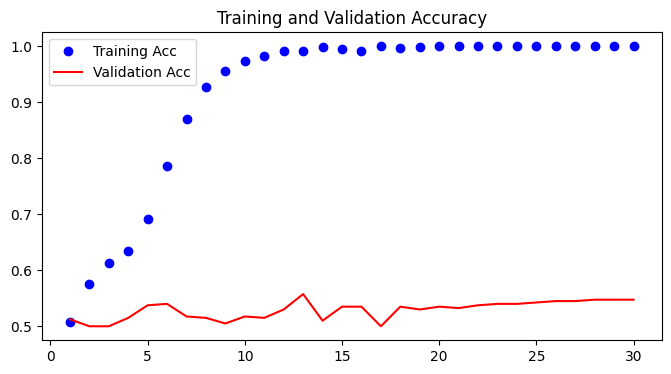

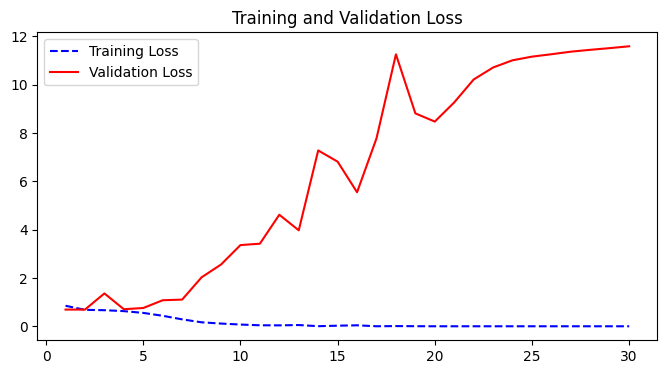

In [45]:
# Make the plot
plt.figure(figsize = (8, 4))

# Define the different values
plt.plot(epochs, acc, "bo", label = "Training Acc")
plt.plot(epochs, val_acc, "r", label = "Validation Acc")

# Adding title and legend
plt.title("Training and Validation Accuracy")
plt.legend()

# Make the plot
plt.figure(figsize = (8, 4))

# Define the different values
plt.plot(epochs, loss, "b--", label = "Training Loss")
plt.plot(epochs, val_loss, "r", label = "Validation Loss")

# Adding title and legend
plt.title("Training and Validation Loss")
plt.legend()

# Show the plots
plt.show()

In [47]:
model.metrics_names

['loss', 'accuracy', 'precision', 'recall', 'auc']

In [49]:
model.evaluate(validation_generator)

20/20 [==============================] - 9s 430ms/step - loss: 11.5891 - accuracy: 0.5475 - precision: 0.5525 - recall: 0.5000 - auc: 0.5338


[11.589103698730469,
 0.5475000143051147,
 0.5524861812591553,
 0.5,
 0.5337750315666199]

In [57]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [60]:
predictions_probs = model.predict(validation_generator)

20/20 [==============================] - 9s 444ms/step


In [61]:
predictions_probs

array([[2.86945514e-03],
       [1.00000000e+00],
       [9.89512920e-01],
       [1.00000000e+00],
       [9.99999702e-01],
       [2.56108592e-08],
       [2.59746701e-01],
       [8.26946170e-27],
       [4.18595881e-23],
       [9.95869756e-01],
       [4.93269227e-02],
       [3.09983811e-33],
       [1.52608759e-10],
       [0.00000000e+00],
       [9.99739945e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99479234e-01],
       [4.44466956e-02],
       [9.99998868e-01],
       [9.99999881e-01],
       [5.74313206e-23],
       [1.00000000e+00],
       [8.48931382e-32],
       [1.09354301e-06],
       [5.44403672e-01],
       [1.00000000e+00],
       [9.99676526e-01],
       [9.70437407e-01],
       [5.90034714e-03],
       [2.81554585e-05],
       [1.00000000e+00],
       [7.21127290e-18],
       [2.74986567e-09],
       [1.41144094e-17],
       [2.75792070e-02],
       [1.40733692e-12],
       [3.84152266e-08],
       [1.00000000e+00],
       [2.18408972e-01],


In [108]:
predictions = predictions_probs > 0.5

In [109]:
predictions

array([[False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [

In [110]:
from sklearn.metrics import classification_report, confusion_matrix

In [111]:
print(classification_report(validation_generator.classes, predictions))

              precision    recall  f1-score   support

           0       0.49      0.54      0.52       200
           1       0.49      0.45      0.47       200

    accuracy                           0.49       400
   macro avg       0.49      0.49      0.49       400
weighted avg       0.49      0.49      0.49       400



In [112]:
confusion_matrix(validation_generator.classes, predictions)

array([[108,  92],
       [111,  89]], dtype=int64)

In [86]:
import seaborn as sns

In [87]:
# Get true labels from the validation generator
y_true = validation_generator.classes

In [88]:
# Get predictions from the model
predictions = model.predict(validation_generator)

20/20 [==============================] - 9s 435ms/step


In [113]:
# If predictions are probabilities, convert them to class labels
y_pred = predictions_probs.argmax(axis = 1)

In [114]:
cm = confusion_matrix(y_true, y_pred)

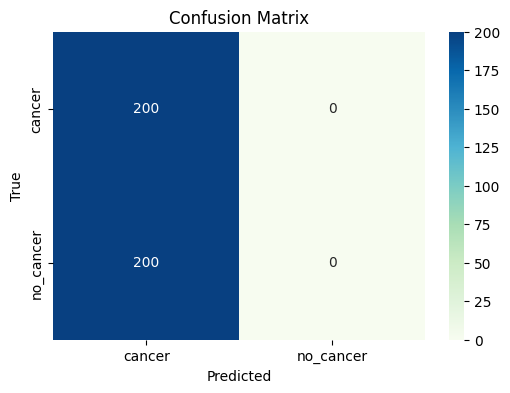

In [121]:
# Make the plot
plt.figure(figsize = (6, 4))

# Create the heatmap
sns.heatmap(cm, 
            annot = True, 
            fmt = "d",
            cmap = "GnBu",
            xticklabels = validation_generator.class_indices.keys(),
            yticklabels = validation_generator.class_indices.keys())

# Adding labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Show the plot
plt.show()